<a href="https://colab.research.google.com/github/fds787896/KagglePractice/blob/master/HousePricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/HousePricing/

/content/drive/MyDrive/HousePricing


In [5]:
pip install feature.engine

     |████████████████████████████████| 205 kB 4.2 MB/s 
     |████████████████████████████████| 9.8 MB 49.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [6]:
#載入所需Packages
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
import collections
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import validation_curve
import pickle
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
from feature_engine.encoding import MeanEncoder
from sklearn.feature_selection import RFECV
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error

In [7]:
#read the train data and test data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [8]:
#show the shape of train data and test data
print("{rows} rows in train and {columns} columns in train".format(rows = str(train.shape[0]),columns = str(train.shape[1])))
print(" ")
print("{rows} rows in test and {columns} columns in test".format(rows = str(test.shape[0]),columns = str(test.shape[1])))

1460 rows in train and 81 columns in train
 
1459 rows in test and 80 columns in test


In [9]:
#see the number of categorical data and number of numerical data in dataframe
catgoricalColumnNumber = len(train.select_dtypes(include = "object").columns)
numericalColumnNumber = len(train.select_dtypes(include = "number").columns)
print("{cat} categorical features in dataframe,{numerical} numerical features in dataframe".\
      format(cat = str(catgoricalColumnNumber),numerical = str(numericalColumnNumber)))

43 categorical features in dataframe,38 numerical features in dataframe


In [10]:
#see range of categorical features
catDescribe = train.describe(include = ["O"])
catDescribe
#初步看起來,沒有值域很廣的值,但是蠻多特徵重複性很高,必須從文檔確認重複的值是不是沒有意義,導致可能對模型造成負擔

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [11]:
#檢視train跟test兩個df合起來na的總數
trainCopy = train.drop(['SalePrice'],axis = 1)
combine = pd.concat([trainCopy,test],axis = 0,ignore_index = True)
naInCombine = combine.isnull().sum().sort_values(ascending=False)
pd.set_option('max_rows', 99999)
naInCombine
#根據文檔描述,大部分缺失值是因為該建築沒有此項設備,所以為na值

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
FireplaceQu      1420
LotFrontage       486
GarageYrBlt       159
GarageFinish      159
GarageQual        159
GarageCond        159
GarageType        157
BsmtExposure       82
BsmtCond           82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MasVnrArea         23
MSZoning            4
Functional          2
BsmtHalfBath        2
BsmtFullBath        2
Utilities           2
GarageCars          1
KitchenQual         1
BsmtFinSF1          1
SaleType            1
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Exterior2nd         1
Exterior1st         1
GarageArea          1
Electrical          1
KitchenAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
Id                  0
HalfBath            0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea  

In [12]:
#填補na的值
#先處理可以填補"None"的特徵
fillNaList = ["PoolQC","MiscFeature","Alley","Fence","FireplaceQu",
"GarageCond","GarageQual","GarageFinish","GarageType","BsmtCond",
"BsmtExposure","BsmtQual","BsmtFinType2","BsmtFinType1","MasVnrType"]
for column in fillNaList:
  combine[column] = combine[column].fillna("None")
#再來處理可以填0的部分
for column in ["GarageYrBlt", "GarageArea", "GarageCars","MasVnrArea"]:
  combine[column] = combine[column].fillna(0)
#接下來處理可以填入mode的部分
for column in ["MSZoning","Utilities","Functional","KitchenQual","Exterior2nd","Exterior1st","Electrical","SaleType"]:
  combine[column] = combine[column].fillna(combine[column].mode()[0])
#接下來處理關於Bsmt的部分,bsmt的部分要考量是不是有bsmt,如果沒有,那Nan值應該補0,如果有bsmt,那就補Mode值比較合理
for column in ["BsmtFullBath","BsmtHalfBath","BsmtFinSF1","BsmtUnfSF","BsmtFinSF2","TotalBsmtSF"]:
  for judge,base,index in zip(combine["BsmtQual"],combine[column],list(range(0,len(combine["BsmtQual"])))):
    if judge == "None" and np.isnan(base):
      combine[column][index] = 0
    elif judge != "None" and np.isnan(base):
      combine[column][index] = combine[column].mode()[0]
    else:
      pass
#最後在處理LotFrontAge,參考鄰居的中位數填入缺失值
combine['LotFrontage'] = combine.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [13]:
#replace the train and test dataframe
label = train["SalePrice"]
train = combine.iloc[0:1460,:]
train = pd.concat([train,label],axis = 1)
test = combine.iloc[1460:,:]

In [14]:
#see which features would have significant impact on dependent(use the spearman cuz of the saleprice is not normal distribution)
train.corr(method = "spearman").loc["SalePrice",:].sort_values(ascending=False)
#從結果來看,影響最大的兩大變分別為OverallQual及GrLivAear一個為Ordinal data一個為continuous data

SalePrice        1.000000
OverallQual      0.809829
GrLivArea        0.731310
GarageCars       0.690711
YearBuilt        0.652682
GarageArea       0.649379
FullBath         0.635957
GarageYrBlt      0.634095
TotalBsmtSF      0.602725
1stFlrSF         0.575408
YearRemodAdd     0.571159
TotRmsAbvGrd     0.532586
Fireplaces       0.519247
OpenPorchSF      0.477561
LotArea          0.456461
MasVnrArea       0.415906
LotFrontage      0.403602
WoodDeckSF       0.353802
HalfBath         0.343008
BsmtFinSF1       0.301871
2ndFlrSF         0.293598
BedroomAbvGr     0.234907
BsmtFullBath     0.225125
BsmtUnfSF        0.185197
ScreenPorch      0.100070
MoSold           0.069432
3SsnPorch        0.065440
PoolArea         0.058453
MSSubClass       0.007192
BsmtHalfBath    -0.012189
Id              -0.018546
YrSold          -0.029899
BsmtFinSF2      -0.038806
MiscVal         -0.062727
LowQualFinSF    -0.067719
OverallCond     -0.129325
KitchenAbvGr    -0.164826
EnclosedPorch   -0.218394
Name: SalePr

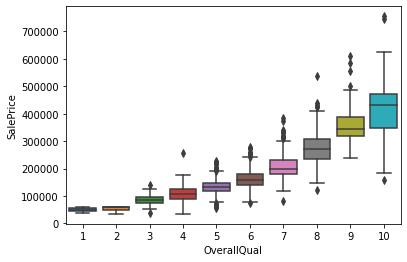

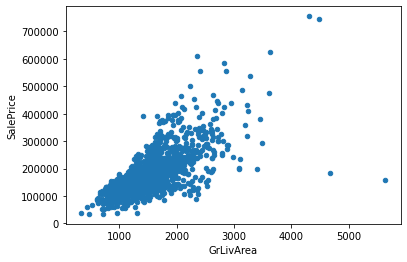

In [15]:
#see　the distribution of OverallQual and GrLivArea to the SalePrice
sns.boxplot(x = train["OverallQual"],y = train["SalePrice"],data = train)
train.plot.scatter(x = "GrLivArea",y = "SalePrice")
#看起來有些值確實怪怪的,OverallQual在小於等於4的狀態下絕大多數的值都低於20萬,但有少部分的值高於20萬
#地上使用面積也有兩個怪怪的值,明明使用面積很大,價錢卻異常便宜,這些值要單獨去看一下它們有其他特徵會影響到SalePrice

In [16]:
train[train["OverallQual"]<=4][train["SalePrice"]>=200000].append(train[train["GrLivArea"]>=4000][train["SalePrice"]<=200000])
#看起來使用面積也沒有特別大,車位也沒到特別多,屋齡也不是說很新,整體來看起來蠻不合理的,應該可以當作Outliear剔除
#大面積價格低那兩筆資料看起來也怪怪的,重點是這兩筆OverallQual的分數還10,屋齡也不老,車位分別為2個跟3個,看起來蠻不合理的,應該可以當作Outliers剔除

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
457,458,20,RL,80.5,53227,Pave,None,IR1,Low,AllPub,...,0,None,None,None,0,3,2008,WD,Normal,256000
523,524,60,RL,130.0,40094,Pave,None,IR1,Bnk,AllPub,...,0,None,None,None,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,None,IR3,Bnk,AllPub,...,480,Gd,None,None,0,1,2008,New,Partial,160000


In [17]:
#remove the outliers
train = train.drop(train[train["OverallQual"]<5][train["SalePrice"]>=200000].index)
train = train.drop(train[train["GrLivArea"]>=4000][train["SalePrice"]<=300000].index)
train = train.reset_index(drop = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Correlation Heatmap')

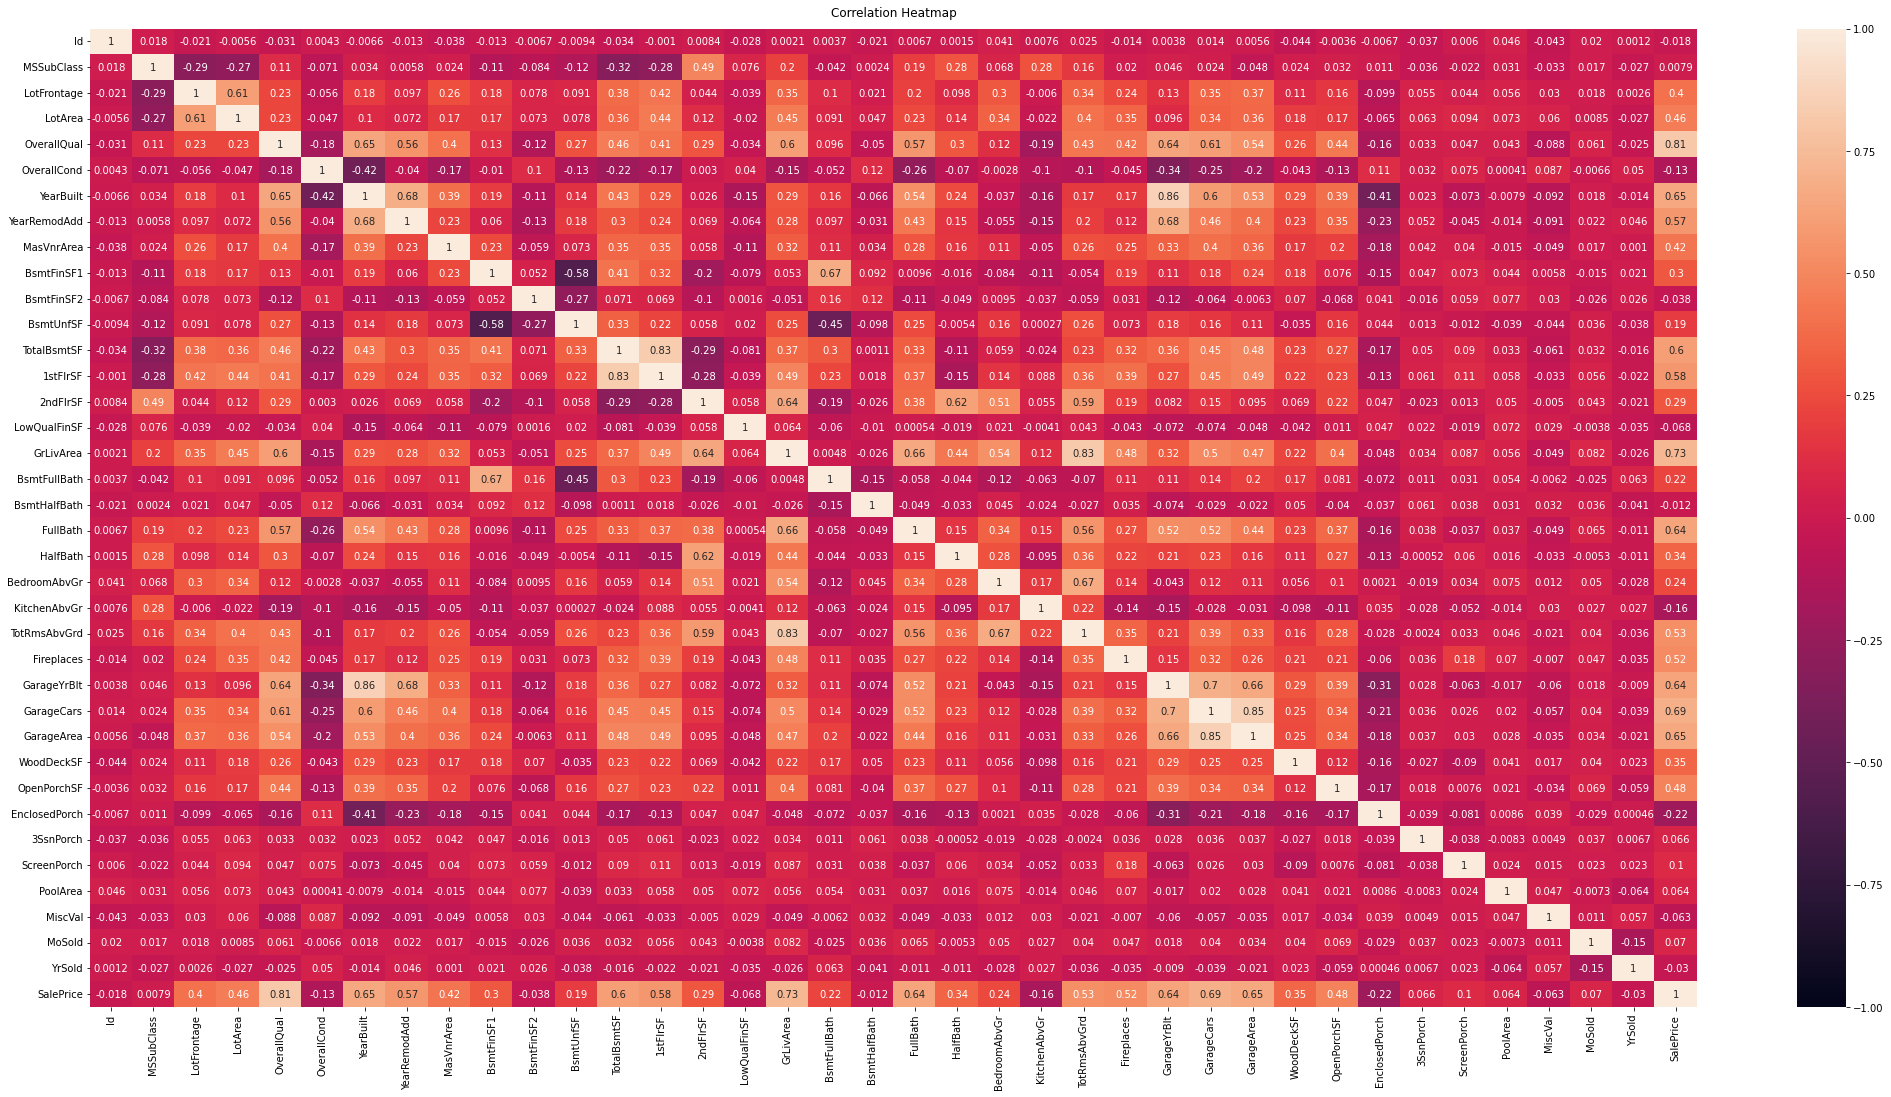

In [18]:
#see the heatmap to see the significant variables and Multi-Collinearity
corr = train.corr(method = 'spearman')
plt.figure(figsize=(36, 18))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
#從圖片上我們可以看到有些變數可能會有共線性的問題,因此在進入建模步驟前應該要讓這種成對的變數做出一些調整,以避免影響模型的表現

In [19]:
#drop the id column for train and test,cuz it is not standing for any meaning for sale price
train = train.drop(["Id"],axis = 1)
test = test.drop("Id",axis = 1)

In [20]:
#use the mean encoding for categorical variables
targetVariableList = train.select_dtypes(include = "object").columns.tolist()
encoder = MeanEncoder(variables = targetVariableList)
encoder.fit(train.iloc[:,:-1],train["SalePrice"])
train_t = encoder.transform(train.iloc[:,:-1])
test = encoder.transform(test)
train = pd.concat([train_t,train["SalePrice"]],axis = 1)

1.88374941136315

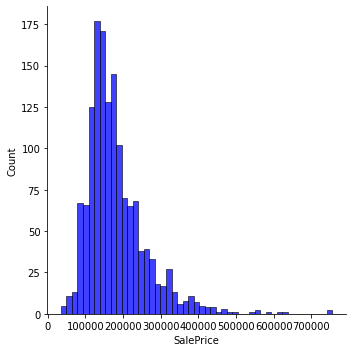

In [21]:
#see the distribution of the SalePrice
sns.displot(train["SalePrice"],color = "b")
train["SalePrice"].skew()
#看起來SalePrice是右尾狀態,而且skewness大於0.5,為了讓模型訓練有更好的效果,需要對此進行調整

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.12304515868289599

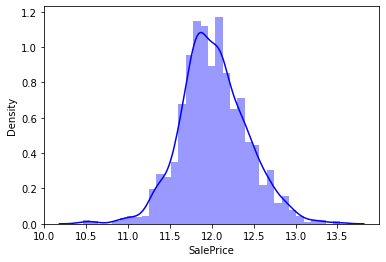

In [22]:
#adjust the SalePrice close to normal distribution
train["SalePrice"] = np.log1p(train["SalePrice"])
sns.distplot(train['SalePrice'], color="b")
train["SalePrice"].skew()
#the skewness is lower than 0.5 so that we can accept the distribution like as normal distribution

In [23]:
#see which features have the skewness situation
numericalData = train.select_dtypes(exclude="object").iloc[:,:-1]
featureSkew = numericalData.skew().sort_values(ascending=False)
highSkew = featureSkew[featureSkew>=0.5].index.tolist() + featureSkew[featureSkew<=-0.5].index.tolist()
for feature in highSkew:
  train[feature] = np.log1p(train[feature])
  test[feature] = np.log1p(test[feature])

In [ ]:
#see the result of adjustment after log method
train.select_dtypes(exclude="object").iloc[:,:-1].skew().sort_values(ascending = False)
test.select_dtypes(exclude = "object").skew().sort_values(ascending = False)
#調整後整起情況有較好

In [25]:
#split the train and label
label = train["SalePrice"]
train = train.iloc[:,:-1]

In [ ]:
#use the feature selection(rfe) to pick out the important model 
estimatorList = [XGBRegressor(),LGBMRegressor(),Ridge(),RandomForestRegressor(),GradientBoostingRegressor()]
rmseList = []
for estimator in estimatorList:
  selector = RFECV(estimator)
  selector = selector.fit(train, label)
  testData = train[selector.get_feature_names_out().tolist()]
  model = estimator.fit(testData,label)
  mse = mean_squared_error(label,model.predict(testData))
  rmse = np.sqrt(mse)
  rmseList.append(rmse)
rmseList
#結果看起來LGBM挑出來的特徵rmse最低,因此選取LGNM的特徵進行下一輪的模型訓練

In [27]:
#reset the train data
selector = RFECV(LGBMRegressor()).fit(train,label)
selectFeatures = selector.get_feature_names_out().tolist()
train = train[selectFeatures]
test = test[selectFeatures]

In [28]:
#set the dataset for cross validation
kf = KFold(n_splits=10, random_state=42, shuffle=True)

In [29]:
#Define metrics
def cv_metrics(model, train=train,label=label):
    mse = -cross_val_score(model, train, label, scoring="neg_mean_squared_error", cv=kf)
    rmse = np.sqrt(mse).mean()
    std = np.sqrt(mse).std()
    rsquare = cross_val_score(model, train, label, scoring="r2", cv=kf)
    adjustR2 = (1 - (1-rsquare)*(len(label)-1)/(len(label)-train.shape[1]-1)).mean()
    return [rmse,std,adjustR2]
#使用rmse,以及adjusted r square來衡量模型

In [30]:
#LGBMRegressor
lightgbm = LGBMRegressor()
print("Rmse:{rmse},Std:{std},AdjustR2:{AdjustR2}".format(rmse=round(cv_metrics(lightgbm)[0],4), std=round(cv_metrics(lightgbm)[1],4), AdjustR2=round(cv_metrics(lightgbm)[2],4)))

Rmse:0.1222,Std:0.0128,AdjustR2:0.8996


In [ ]:
# XGBoost Regressor
xgboost = XGBRegressor()
lst = [round(cv_metrics(xgboost)[0],4),round(cv_metrics(xgboost)[1],4),round(cv_metrics(xgboost)[2],4)]

In [32]:
print("Rmse:{rmse},Std:{std},AdjustR2:{AdjustR2}".format(rmse=lst[0], std=lst[1], AdjustR2=lst[2]))

Rmse:0.1221,Std:0.0144,AdjustR2:0.8996


In [33]:
# Ridge Regressor
Ridge = Ridge()
print("Rmse:{rmse},Std:{std},AdjustR2:{AdjustR2}".format(rmse=round(cv_metrics(Ridge)[0],4), std=round(cv_metrics(Ridge)[1],4), AdjustR2=round(cv_metrics(Ridge)[2],4)))

Rmse:0.1162,Std:0.0097,AdjustR2:0.9089


In [34]:
# Support Vector Regressor
svr = SVR()
print("Rmse:{rmse},Std:{std},AdjustR2:{AdjustR2}".format(rmse=round(cv_metrics(svr)[0],4), std=round(cv_metrics(svr)[1],4), AdjustR2=round(cv_metrics(svr)[2],4)))
#svr看起來對此資料及訓練效果不是很好,在stacking階段可能將其排除

Rmse:0.282,Std:0.0224,AdjustR2:0.4741


In [35]:
# Gradient Boosting Regressor
gbr = GradientBoostingRegressor() 
print("Rmse:{rmse},Std:{std},AdjustR2:{AdjustR2}".format(rmse=round(cv_metrics(gbr)[0],4), std=round(cv_metrics(gbr)[1],4), AdjustR2=round(cv_metrics(gbr)[2],4)))

Rmse:0.1214,Std:0.0118,AdjustR2:0.9003


In [36]:
# Random Forest Regressor
rf = RandomForestRegressor()
print("Rmse:{rmse},Std:{std},AdjustR2:{AdjustR2}".format(rmse=round(cv_metrics(rf)[0],4), std=round(cv_metrics(rf)[1],4), AdjustR2=round(cv_metrics(rf)[2],4)))

Rmse:0.1341,Std:0.0121,AdjustR2:0.8798


In [ ]:
# Stack up all the models above, optimized using xgboost
estimators = [("lightgbm",LGBMRegressor()),("xgboost",XGBRegressor()),("gbr",GradientBoostingRegressor()),("rf",RandomForestRegressor()),("Ridge",Ridge)]
stack_gen = StackingRegressor(estimators=estimators,final_estimator=Ridge)
lst = [round(cv_metrics(stack_gen)[0],4),round(cv_metrics(stack_gen)[1],4),round(cv_metrics(stack_gen)[2],4)]

In [38]:
print("Rmse:{rmse},Std:{std},AdjustR2:{AdjustR2}".format(rmse=lst[0], std=lst[1], AdjustR2=lst[2]))

Rmse:0.1121,Std:0.0117,AdjustR2:0.915


In [ ]:
#fit the model
stack_gen_model = stack_gen.fit(np.array(train), np.array(label))
lgb_model_full_data = lightgbm.fit(train, label)
xgb_model_full_data = xgboost.fit(train, label)
ridge_model_full_data = Ridge.fit(train, label)
rf_model_full_data = rf.fit(train, label)
gbr_model_full_data = gbr.fit(train, label)

In [40]:
# Blend models in order to make the final predictions more robust to overfitting
def blended_predictions(X):
    return ((0.2 * ridge_model_full_data.predict(X)) + \
            (0.15 * gbr_model_full_data.predict(X)) + \
            (0.15 * xgb_model_full_data.predict(X)) + \
            (0.15 * lgb_model_full_data.predict(X)) + \
            (0.15 * rf_model_full_data.predict(X)) + \
            (0.2 * stack_gen_model.predict(np.array(X))))

In [41]:
#計算模型blending prediction的rmse
mse = mean_squared_error(label,blended_predictions(train))
rmse = np.sqrt(mse)
rmse

0.07235963300333886

In [42]:
#計算Stacking的adjusted R-Square
stackScore = stack_gen.fit(np.array(train), np.array(label)).score(np.array(train),np.array(label))
lgbmScore = lgb_model_full_data.score(train, label)
xgbScore = xgb_model_full_data.score(train, label)
ridgeScore = ridge_model_full_data.score(train, label)
rfScore = rf_model_full_data.score(train, label)
gbrScore = gbr_model_full_data.score(train, label)
scoreList = [stackScore, lgbmScore, xgbScore, ridgeScore, rfScore, gbrScore]
meanScore = sum(scoreList)/len(scoreList)
adR2 = 1 - (1-meanScore)*(len(label)-1)/(len(label)-train.shape[1]-1)
adR2
#結果顯示模型解釋力為95.95%

[02:54:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:54:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:54:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:54:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:54:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:54:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [87]:
#Submission the results
SalePrice = pd.Series(np.expm1(blended_predictions(test)), name="SalePrice")
originTest = pd.read_csv("test.csv")
Id = originTest.iloc[:,0]
Submission = pd.concat([Id, SalePrice], axis=1)

In [90]:
#fix the outlier prediction
q1 = Submission["SalePrice"].quantile(0.0045)
q2 = Submission["SalePrice"].quantile(0.99)
Submission["SalePrice"] = Submission["SalePrice"].apply(lambda x: x if x > q1 else x*0.85)
Submission["SalePrice"] = Submission["SalePrice"].apply(lambda x: x if x < q2 else x*1.1)

In [91]:
Submission.to_csv("Submission.csv", index=False)
#最終提交結果score顯示0.12620,排名為百分比前15左右,參賽人數4470